# Model Development 

After the task of cleaning the data, converting it into numeric format, feature selection and feature engineering. The data is finally in shape for developing a machine learning classification model

In [3]:
# importing the libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import validation_curve, train_test_split
from sklearn.metrics import accuracy_score, auc, roc_auc_score
import xgboost

In [4]:
df = pd.read_csv('ML_Artivatic_dataset/final_train.csv')
df

,member_id,revol_bal,total_rev_hi_lim,collection_recovery_fee,delinq_2yrs,revol_util,pub_rec,recoveries,open_acc,inq_last_6mths,loan_amnt,funded_amnt,funded_amnt_inv,term,dti,last_week_pay,grade,purpose,home_ownership,verification_status,initial_list_status,loan_to_income,bad_state,avl_lines,int_paid,emi_paid_progress_perc,total_repayment_progress,loan_status
0,58189336,22515.0,30800.0,0.0,0.0,73.1,1.0,0.0,14.0,1.0,14350,14350,14350.0,36,33.88,26,4,2,4,1,0,2.000000,0.0,14.0,1173.84,16.560510,16.560510,0
1,70011223,7624.0,32900.0,0.0,0.0,23.2,0.0,0.0,6.0,1.0,4800,4800,4800.0,36,3.64,9,1,4,1,1,1,13.541667,0.0,7.0,83.95,5.732484,5.732484,0
2,70255675,10877.0,34900.0,0.0,0.0,31.2,0.0,0.0,5.0,0.0,10000,10000,10000.0,36,18.42,9,0,2,4,0,1,4.500000,0.0,14.0,56.47,5.732484,5.732484,0
3,1893936,13712.0,24700.0,0.0,0.0,55.5,0.0,0.0,10.0,2.0,15000,15000,15000.0,36,14.97,135,3,2,5,0,0,7.000000,0.0,11.0,4858.62,85.987261,85.987261,0
4,7652106,35835.0,47033.0,0.0,0.0,76.2,0.0,0.0,11.0,0.0,16000,16000,16000.0,36,20.16,96,1,1,5,2,1,3.250000,0.0,16.0,2296.41,61.146497,61.146497,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532423,31296187,15775.0,24800.0,0.0,0.0,63.6,1.0,0.0,12.0,0.0,20000,20000,20000.0,36,14.53,65,1,2,1,1,0,3.750000,0.0,22.0,2595.45,41.401274,41.401274,0
532424,29403184,9453.0,17800.0,0.0,0.0,53.1,1.0,0.0,10.0,0.0,12000,12000,12000.0,60,22.97,70,2,2,1,0,1,4.916667,0.0,19.0,2182.92,26.819923,26.819923,0
532425,7357607,12085.0,24200.0,0.0,0.0,49.9,0.0,0.0,14.0,1.0,18725,18725,18725.0,60,27.27,9,4,2,5,2,0,2.269907,0.0,12.0,645.32,3.448276,3.448276,1
532426,23182668,20902.0,23300.0,0.0,0.0,89.7,0.0,0.0,7.0,1.0,21000,21000,21000.0,60,14.91,78,3,1,5,1,1,2.380952,0.0,7.0,4619.79,29.885057,29.885057,0


In [5]:
cols = df.columns.values.tolist()
cols.remove('member_id')
cols.remove('loan_status')

In [6]:
X_train = df[cols]

y_train = df['loan_status']

X_train.replace([np.inf, -np.inf], np.nan, inplace=True)

from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='median')
X_train = pd.DataFrame(imp.fit_transform(X_train))

# Split train and cross validation sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.30)
eval_set=[(X_test, y_test)]

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


## Random Forest Classifier 

In [7]:
rf = RandomForestClassifier(n_estimators=100, verbose=5, n_jobs=-1)
rf.fit(np.array(X_train), np.array(y_train))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100


[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   19.4s


building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58

[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.6min


building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.3min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=5,
                       warm_start=False)

In [13]:
rf_perf = roc_auc_score(y_test, rf.predict(X_test))
rf_perf

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    3.5s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    5.1s finished


0.6786121781658906

## SGD Classifier

In [14]:
sgd = SGDClassifier(loss='modified_huber', verbose=2, n_jobs=-1, max_iter=1000)
sgd.fit(X_train, y_train)

-- Epoch 1
Norm: 3882376.97, NNZs: 26, Bias: 10477.522090, T: 372699, Avg. loss: 1719816217.704885
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 1933799.50, NNZs: 26, Bias: 11410.791628, T: 745398, Avg. loss: 181970232.487601
Total training time: 0.21 seconds.
-- Epoch 3
Norm: 1287456.57, NNZs: 26, Bias: 11733.297810, T: 1118097, Avg. loss: 103674246.886530
Total training time: 0.31 seconds.
-- Epoch 4
Norm: 964446.83, NNZs: 26, Bias: 11865.311020, T: 1490796, Avg. loss: 72105072.555572
Total training time: 0.41 seconds.
-- Epoch 5
Norm: 770284.67, NNZs: 26, Bias: 11915.747549, T: 1863495, Avg. loss: 53542668.652848
Total training time: 0.51 seconds.
-- Epoch 6
Norm: 640462.76, NNZs: 26, Bias: 11935.475134, T: 2236194, Avg. loss: 43372096.065837
Total training time: 0.61 seconds.
-- Epoch 7
Norm: 547645.44, NNZs: 26, Bias: 11944.098451, T: 2608893, Avg. loss: 37255301.403159
Total training time: 0.72 seconds.
-- Epoch 8
Norm: 477916.32, NNZs: 26, Bias: 11947.599707, T: 2981592, A

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='modified_huber',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=2, warm_start=False)

In [15]:
sgd_perf = roc_auc_score(y_test, sgd.predict(X_test))
sgd_perf

0.4526338615851597

## KNeighbors Classifier

In [11]:
knc = KNeighborsClassifier(n_neighbors=20, n_jobs=-1)
knc.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
                     weights='uniform')

In [16]:
knc_perf = roc_auc_score(y_test, knc.predict(X_test))
knc_perf

0.6112162383370338

## Gradient Boosting Classifier 

In [18]:
gbc = GradientBoostingClassifier(n_estimators=1000, max_depth=5, verbose=2)
gbc.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           1.0586           52.54m
         2           1.0216           58.02m
         3           0.9934           60.09m
         4           0.9718           58.38m
         5           0.9582           57.28m
         6           0.9458           56.32m
         7           0.9360           55.75m
         8           0.9236           55.52m
         9           0.9161           55.17m
        10           0.9093           55.23m
        11           0.9036           55.22m
        12           0.8946           55.29m
        13           0.8895           55.27m
        14           0.8825           55.28m
        15           0.8771           55.35m
        16           0.8719           55.18m
        17           0.8680           54.95m
        18           0.8650           54.65m
        19           0.8622           54.34m
        20           0.8584           54.00m
        21           0.8543           53.93m
        2

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=2,
                           warm_start=False)

In [19]:
gbc_perf = roc_auc_score(y_test, gbc.predict(X_test))
gbc_perf

0.7191541046359547

## XGBoost 

In [20]:
from datetime import datetime
print('Initializing xgboost.sklearn.XGBClassifier and starting training...')

st = datetime.now()

clf = xgboost.sklearn.XGBClassifier(
    objective="binary:logistic", 
    learning_rate=0.05, 
    seed=9616, 
    max_depth=20, 
    gamma=10, 
    n_estimators=500)

clf.fit(X_train, y_train, early_stopping_rounds=20, eval_metric="auc", eval_set=eval_set, verbose=True)


Initializing xgboost.sklearn.XGBClassifier and starting training...
[0]	validation_0-auc:0.797739
Will train until validation_0-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.803201
[2]	validation_0-auc:0.806008
[3]	validation_0-auc:0.808736
[4]	validation_0-auc:0.810664
[5]	validation_0-auc:0.812989
[6]	validation_0-auc:0.813518
[7]	validation_0-auc:0.814749
[8]	validation_0-auc:0.816762
[9]	validation_0-auc:0.818446
[10]	validation_0-auc:0.819051
[11]	validation_0-auc:0.819937
[12]	validation_0-auc:0.820884
[13]	validation_0-auc:0.821352
[14]	validation_0-auc:0.822292
[15]	validation_0-auc:0.82284
[16]	validation_0-auc:0.823493
[17]	validation_0-auc:0.824134
[18]	validation_0-auc:0.824683
[19]	validation_0-auc:0.825136
[20]	validation_0-auc:0.825666
[21]	validation_0-auc:0.826102
[22]	validation_0-auc:0.82654
[23]	validation_0-auc:0.826873
[24]	validation_0-auc:0.827673
[25]	validation_0-auc:0.828058
[26]	validation_0-auc:0.82826
[27]	validation_0-auc:0.828736
[28]	validati

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=10,
              learning_rate=0.05, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=9616,
              silent=None, subsample=1, verbosity=1)

In [22]:
clf_perf = roc_auc_score(y_test, clf.predict(X_test))

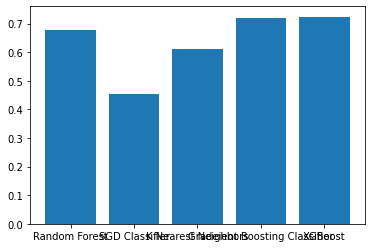

In [23]:
algos = ['Random Forest', 'SGD Classifier', 'K Nearest Neighbors', 'Gradeient Boosting Classifier', 'XGBoost' ]
perf = [rf_perf, sgd_perf, knc_perf, gbc_perf, clf_perf]

import matplotlib.pyplot as plt 

plt.bar(algos, perf)
plt.show()

We can see that XGBoost gave the best roc_auc_score

## Getting predictions and generating submission

In [28]:
test = pd.read_csv('ML_Artivatic_dataset/final_test.csv')
member_id = test['member_id']
test = test.drop(columns=['member_id'])

test.replace([np.inf, -np.inf], np.nan, inplace=True)
imp = SimpleImputer(strategy='median')
test = pd.DataFrame(imp.fit_transform(test))

predictions = clf.predict(test)
predictions

array([0, 0, 0, ..., 1, 0, 0])

In [29]:
submission = pd.DataFrame()
submission['member_id'] = member_id 
submission['loan_status'] = predictions 
submission 

,member_id,loan_status
0,11937648,0
1,38983318,0
2,27999917,0
3,61514932,0
4,59622821,0
...,...,...
354946,19145105,0
354947,46304777,0
354948,903745,1
354949,53032475,0


In [31]:
submission.to_csv('ML_Artivatic_dataset/submission1.csv', index=False)

## Saving the best model 

In [32]:
import pickle 

pickle.dump(clf, open('xgboost.dat', 'wb'))